In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import math

In [3]:
xl = pd.ExcelFile(r"C:\Users\Dell\Desktop\Training Classes\UP OU Demo\Sales_data.xlsx")

In [4]:
xl.sheet_names
print (xl)

In [6]:
df = xl.parse("Sheet1")
print (df)

    period        sales_a        sales_b  price_a  price_b   ads_b  \
0        1      45.454545  679548.408057    44.00    61.56  531000   
1        2   51919.228670  620905.137703    54.97    62.09  399000   
2        3  158308.494784  527152.744246    53.68    62.13  282000   
3        4  206347.693481  401672.025723    52.46    62.20  256000   
4        5  281893.004115  340984.883902    43.74    64.17  297000   
5        6  331328.187384  283159.328189    37.57    66.09  193000   
6        7  376942.496494  243670.886076    35.65    66.36  195000   
7        8  378894.901737  202938.971360    35.11    66.69  120000   
8        9  434965.831435  200334.295700    35.12    65.81   72000   
9       10  425606.936416  172570.390554    34.60    66.06  157000   
10      11  404534.883721  147985.513807    34.40    66.27  110000   
11      12  455940.594059  150897.934750    34.34    66.82  203000   
12      13  432531.908578  132211.967848    33.69    67.18   36000   
13      14  467367.4

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [15]:
train = df.loc[df['period'] <= 30]
test = df.loc[df['period'] > 30]

In [16]:
independent_variables = train.drop('sales_a', axis = 1)

In [17]:
print (independent_variables)

    period        sales_b  price_a  price_b   ads_b  influencers_b
0        1  679548.408057    44.00    61.56  531000          93000
1        2  620905.137703    54.97    62.09  399000              0
2        3  527152.744246    53.68    62.13  282000              0
3        4  401672.025723    52.46    62.20  256000          15000
4        5  340984.883902    43.74    64.17  297000              0
5        6  283159.328189    37.57    66.09  193000              0
6        7  243670.886076    35.65    66.36  195000          76000
7        8  202938.971360    35.11    66.69  120000              0
8        9  200334.295700    35.12    65.81   72000              0
9       10  172570.390554    34.60    66.06  157000          19000
10      11  147985.513807    34.40    66.27  110000              0
11      12  150897.934750    34.34    66.82  203000              0
12      13  132211.967848    33.69    67.18   36000         111000
13      14  134164.874552    33.77    69.75   54000          7

In [18]:
lm.fit (independent_variables, train.sales_a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print (lm.intercept_)

447516.88456017256


In [20]:
pd.DataFrame(list(zip(independent_variables.columns, lm.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,period,-6633.749399
1,sales_b,-0.759839
2,price_a,-1729.367185
3,price_b,3744.135224
4,ads_b,-0.117634
5,influencers_b,-0.134294


In [21]:
lm.score(independent_variables, train.sales_a)

0.9776928766342411

In [22]:
lm.predict(independent_variables)

array([  3979.68030368,  52935.63480815, 133682.44599251, 225809.79020234,
       284935.88953093, 352333.14335768, 369593.95139631, 415108.20185378,
       412787.90630804, 416535.03954421, 437794.36649057, 420170.68000442,
       434945.5870922 , 438626.29138969, 459483.40148479, 443956.30584238,
       463664.58784798, 465195.36393566, 456946.46898958, 459892.6588033 ,
       455346.78427767, 454480.50444622, 439721.36029534, 458885.68227208,
       461629.45564849, 451078.27624454, 447649.0848565 , 450713.9185717 ,
       456767.81939061, 447485.58945618])

In [23]:
independent_variables_2 = test.drop('sales_a', axis = 1)

In [24]:
lm.predict(independent_variables_2)

array([446619.14986785, 437577.56164814, 441160.97087512, 438128.31898703,
       432300.43626724, 426439.24798988, 411841.99789189, 429500.02479843,
       424498.71966821, 423676.0882801 , 421435.11287534, 411184.98644961,
       416154.06506735, 423132.25502518, 422371.81301833, 415004.24455786,
       416870.28189938, 412544.21572619, 405229.72107134, 404757.51679513])

In [25]:
print (independent_variables_2)

    period       sales_b  price_a  price_b  ads_b  influencers_b
30      31  49630.290668    23.91    78.44  84000              0
31      32  51064.100930    23.75    78.47  46000          46000
32      33  49213.454406    24.75    78.19      0              0
33      34  46732.648141    25.10    78.81      0              0
34      35  43515.445494    25.03    78.34      0              0
35      36  44245.654105    25.28    78.81      0              0
36      37  41814.744802    25.66    79.35  95000              0
37      38  42617.813668    25.56    82.97      0              0
38      39  36974.492206    25.22    84.68  82000              0
39      40  34116.674539    25.02    84.68  54000              0
40      41  38067.246649    25.24    85.06      0              0
41      42  34411.247803    25.28    85.35  63000              0
42      43  32359.445932    24.97    85.91      0              0
43      44  32779.991147    24.78    90.36  26000              0
44      45  32139.766335 

In [26]:
print (lm.predict(independent_variables_2))

[446619.14986785 437577.56164814 441160.97087512 438128.31898703
 432300.43626724 426439.24798988 411841.99789189 429500.02479843
 424498.71966821 423676.0882801  421435.11287534 411184.98644961
 416154.06506735 423132.25502518 422371.81301833 415004.24455786
 416870.28189938 412544.21572619 405229.72107134 404757.51679513]


Text(0.5,1,'Predicted vs. Actual Sales')

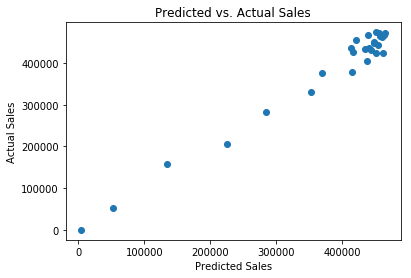

In [27]:
plt.scatter(lm.predict(independent_variables), train.sales_a)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Predicted vs. Actual Sales")

In [28]:
mseFull = math.sqrt(np.mean((test.sales_a - lm.predict(independent_variables_2)) ** 2))
print (mseFull)

19053.21836565928


In [29]:
mseFull = math.sqrt(np.mean((train.sales_a - lm.predict(independent_variables)) ** 2))
print (mseFull)

18397.272896135324


In [30]:
print (train)

    period        sales_a        sales_b  price_a  price_b   ads_b  \
0        1      45.454545  679548.408057    44.00    61.56  531000   
1        2   51919.228670  620905.137703    54.97    62.09  399000   
2        3  158308.494784  527152.744246    53.68    62.13  282000   
3        4  206347.693481  401672.025723    52.46    62.20  256000   
4        5  281893.004115  340984.883902    43.74    64.17  297000   
5        6  331328.187384  283159.328189    37.57    66.09  193000   
6        7  376942.496494  243670.886076    35.65    66.36  195000   
7        8  378894.901737  202938.971360    35.11    66.69  120000   
8        9  434965.831435  200334.295700    35.12    65.81   72000   
9       10  425606.936416  172570.390554    34.60    66.06  157000   
10      11  404534.883721  147985.513807    34.40    66.27  110000   
11      12  455940.594059  150897.934750    34.34    66.82  203000   
12      13  432531.908578  132211.967848    33.69    67.18   36000   
13      14  467367.4

In [31]:
print (test)

    period        sales_a       sales_b  price_a  price_b  ads_b  \
30      31  440317.858637  49630.290668    23.91    78.44  84000   
31      32  465010.526316  51064.100930    23.75    78.47  46000   
32      33  463030.303030  49213.454406    24.75    78.19      0   
33      34  446573.705179  46732.648141    25.10    78.81      0   
34      35  424450.659209  43515.445494    25.03    78.34      0   
35      36  445609.177215  44245.654105    25.28    78.81      0   
36      37  430553.390491  41814.744802    25.66    79.35  95000   
37      38  452777.777778  42617.813668    25.56    82.97      0   
38      39  413521.015067  36974.492206    25.22    84.68  82000   
39      40  402358.113509  34116.674539    25.02    84.68  54000   
40      41  462519.809826  38067.246649    25.24    85.06      0   
41      42  436985.759494  34411.247803    25.28    85.35  63000   
42      43  420064.076892  32359.445932    24.97    85.91      0   
43      44  437086.359968  32779.991147    24.78

In [32]:
print (lm.predict(independent_variables_2))

[446619.14986785 437577.56164814 441160.97087512 438128.31898703
 432300.43626724 426439.24798988 411841.99789189 429500.02479843
 424498.71966821 423676.0882801  421435.11287534 411184.98644961
 416154.06506735 423132.25502518 422371.81301833 415004.24455786
 416870.28189938 412544.21572619 405229.72107134 404757.51679513]


In [37]:
from sklearn.metrics import r2_score

In [44]:
test_pred = lm.predict(independent_variables_2)

In [39]:
print (r2_score(test_pred, test.sales_a))

-1.7444200269150203


In [40]:
print (test_pred)

[446619.14986785 437577.56164814 441160.97087512 438128.31898703
 432300.43626724 426439.24798988 411841.99789189 429500.02479843
 424498.71966821 423676.0882801  421435.11287534 411184.98644961
 416154.06506735 423132.25502518 422371.81301833 415004.24455786
 416870.28189938 412544.21572619 405229.72107134 404757.51679513]


In [41]:
print (test.sales_a)

30    440317.858637
31    465010.526316
32    463030.303030
33    446573.705179
34    424450.659209
35    445609.177215
36    430553.390491
37    452777.777778
38    413521.015067
39    402358.113509
40    462519.809826
41    436985.759494
42    420064.076892
43    437086.359968
44    441267.942584
45    430973.797419
46    409751.283064
47    407815.631263
48    411943.319838
49    431752.988048
Name: sales_a, dtype: float64


In [46]:
actual = test.sales_a.values

In [47]:
print (actual)

[440317.85863655 465010.52631579 463030.3030303  446573.70517928
 424450.65920895 445609.17721519 430553.39049104 452777.77777778
 413521.01506741 402358.11350919 462519.80982567 436985.75949367
 420064.07689227 437086.35996772 441267.94258373 430973.79741885
 409751.28306356 407815.63126253 411943.31983806 431752.98804781]


In [48]:
r2_score(test_pred, actual)

-1.7444200269150203